In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data-Belajar/Joki/Joki-47/sensor_failure.csv')
data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0
1,pos,453236,na,2926,na,0,0,0,0,222,...,7908038,3026002,5025350,2025766,1160638,533834,493800,6914,0,0
2,pos,72504,na,1594,1052,0,0,0,244,178226,...,1432098,372252,527514,358274,332818,284178,3742,0,0,0
3,pos,762958,na,na,na,na,na,776,281128,2186308,...,na,na,na,na,na,na,na,na,na,na
4,pos,695994,na,na,na,na,na,0,0,0,...,1397742,495544,361646,28610,5130,212,0,0,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
36184,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
36185,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
36186,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [ ]:
data.drop(data[data.eq('na').any(axis=1)].index, inplace=True)
data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
11,pos,281324,2,3762,2346,0,0,4808,215720,967572,...,624606,269976,638838,1358354,819918,262804,2824,0,0,0
12,pos,43482,0,1534,1388,0,0,0,0,40024,...,497196,121166,202272,232636,645690,50,0,0,0,0
15,pos,892422,2,1342,1100,0,0,0,2716,656148,...,3500996,1980134,5102372,7882256,14095922,6605678,206190,774,0,0
17,pos,176346,0,6982,5922,0,0,0,0,65836,...,2428526,720862,1189150,1710512,1018248,626354,32208,0,0,0
21,pos,460990,0,3322,212,0,0,0,1094,63812,...,864476,336864,820060,1116896,2489538,1271120,41198,20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35620,neg,118028,0,740,714,618,690,0,0,0,...,838952,631338,541036,1285274,1832658,165838,3022,0,0,0
35750,neg,229916,0,616,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36031,neg,224084,0,912,766,0,0,0,0,0,...,413576,209524,469894,2233992,5933084,364450,12422,0,0,0
36058,neg,197332,0,658,616,216,346,0,0,0,...,73940,49896,90454,575264,104600,10352,36,0,0,0


In [ ]:
data['class'] = data['class'].replace({'pos': 1, 'neg': 0})
data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
11,1,281324,2,3762,2346,0,0,4808,215720,967572,...,624606,269976,638838,1358354,819918,262804,2824,0,0,0
12,1,43482,0,1534,1388,0,0,0,0,40024,...,497196,121166,202272,232636,645690,50,0,0,0,0
15,1,892422,2,1342,1100,0,0,0,2716,656148,...,3500996,1980134,5102372,7882256,14095922,6605678,206190,774,0,0
17,1,176346,0,6982,5922,0,0,0,0,65836,...,2428526,720862,1189150,1710512,1018248,626354,32208,0,0,0
21,1,460990,0,3322,212,0,0,0,1094,63812,...,864476,336864,820060,1116896,2489538,1271120,41198,20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35620,0,118028,0,740,714,618,690,0,0,0,...,838952,631338,541036,1285274,1832658,165838,3022,0,0,0
35750,0,229916,0,616,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36031,0,224084,0,912,766,0,0,0,0,0,...,413576,209524,469894,2233992,5933084,364450,12422,0,0,0
36058,0,197332,0,658,616,216,346,0,0,0,...,73940,49896,90454,575264,104600,10352,36,0,0,0


In [ ]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Modeling SVM

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

#Modeling Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

#prediksi setiap model

In [ ]:
svm_predictions = svm_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

In [ ]:
print(X_test.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 25409 to 17267
Columns: 170 entries, aa_000 to eg_000
dtypes: int64(1), object(169)
memory usage: 153.6+ KB
None


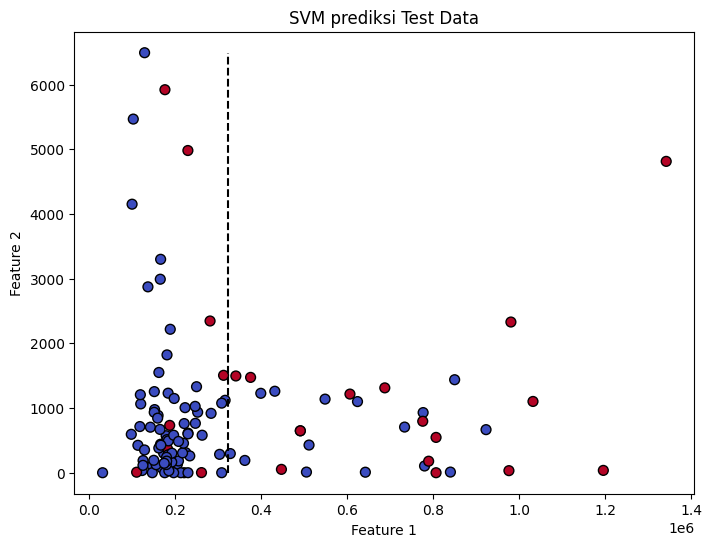

In [ ]:

X_test_sampled_numeric = X_test.astype(float)
X_test_sampled_selected = X_test_sampled_numeric[X_train.columns]

middle_values = X_test_sampled_selected.mean()

hyperplane_y = np.linspace(X_test_sampled_selected.iloc[:, 3].min(), X_test_sampled_selected.iloc[:, 3].max(), 100)
hyperplane_x = np.full_like(hyperplane_y, middle_values[80])


plt.figure(figsize=(8, 6))
plt.scatter(X_test_sampled_selected.iloc[:, 80], X_test_sampled_selected.iloc[:, 3], c=svm_predictions, cmap='coolwarm', s=50, edgecolors='k')
plt.plot(hyperplane_x, hyperplane_y, 'k--', label='Hyperplane')
plt.title('SVM prediksi Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

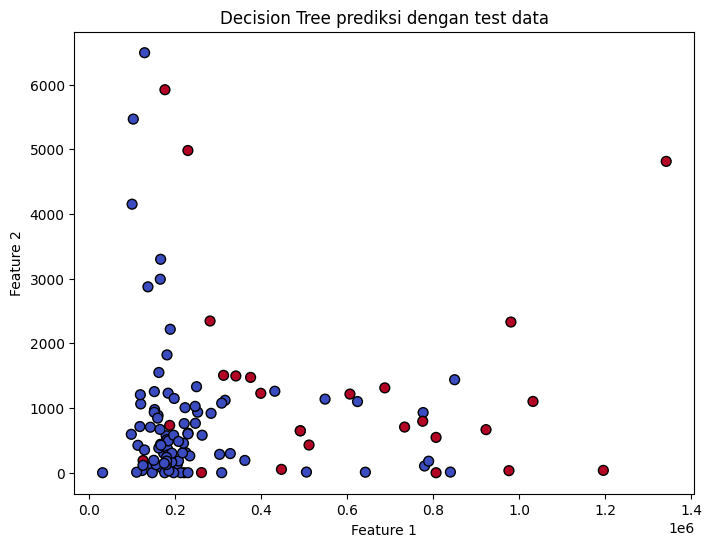

In [ ]:

X_test_tree = X_test.astype(float)

X_test_tree_sample = X_test_tree[X_train.columns]


middle_values = X_test_tree_sample.mean()

hyperplane_y = np.linspace(X_test_tree_sample.iloc[:, 3].min(), X_test_tree_sample.iloc[:, 3].max(), 100)
hyperplane_x = np.full_like(hyperplane_y, middle_values[80])


plt.figure(figsize=(8, 6))
# plt.plot(x_values, hyperplane_y, 'k--', label='Hyperplane')
# plt.plot(hyperplane_x, hyperplane_y, 'k--', label='Hyperplane')
plt.scatter(X_test_tree_sample.iloc[:, 80], X_test_tree_sample.iloc[:, 3], c=dt_predictions, cmap='coolwarm', s=50, edgecolors='k')
plt.title('Decision Tree prediksi dengan test data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# SVM

#Classification Performance

In [ ]:
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)
svm_matrix = confusion_matrix(y_test, svm_predictions)

print("Evaluasi Model SVM :")
print("Accuracy:", svm_accuracy)
print("Classification Report:")
print(svm_report)

Evaluasi Model SVM :
Accuracy: 0.9391304347826087
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        88
           1       0.92      0.81      0.86        27

    accuracy                           0.94       115
   macro avg       0.93      0.90      0.91       115
weighted avg       0.94      0.94      0.94       115



# Confusion Matrix

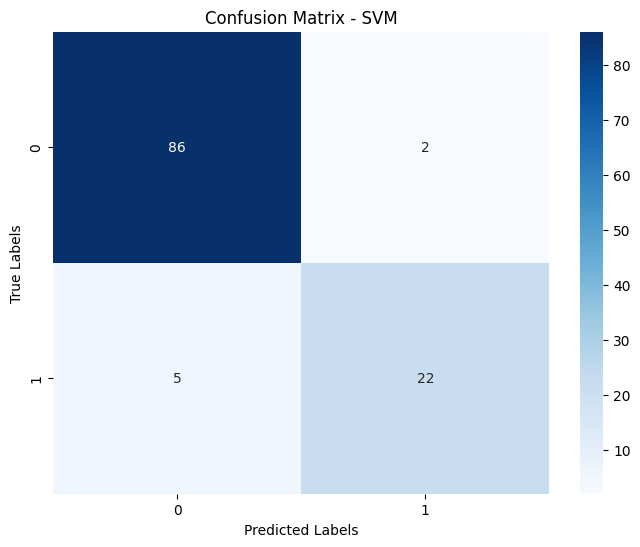

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(svm_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()

#Lost Performance

In [ ]:
class_indices = [0, 1]

for class_index in class_indices:
    true_positives_svm = svm_matrix[class_index, class_index]
    false_negatives_svm = sum(svm_matrix[class_index, :]) - true_positives_svm
    false_positives_svm = sum(svm_matrix[:, class_index]) - true_positives_svm

    lost_performance_svm = false_negatives_svm + false_positives_svm
    print("Lost Performance SVM  Class", class_index, ":", lost_performance_svm)

Lost Performance SVM  Class 0 : 7
Lost Performance SVM  Class 1 : 7


# Decision Tree

#Classification Performance

In [ ]:
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_report = classification_report(y_test, dt_predictions)
dt_matrix = confusion_matrix(y_test, dt_predictions)

print("\nEvaluasi Model Decision Tree :")
print("Accuracy:", dt_accuracy)
print("Classification Report:")
print(dt_report)
print("Confusion Matrix:")
print(dt_matrix)


Evaluasi Model Decision Tree :
Accuracy: 0.9304347826086956
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        88
           1       0.85      0.85      0.85        27

    accuracy                           0.93       115
   macro avg       0.90      0.90      0.90       115
weighted avg       0.93      0.93      0.93       115

Confusion Matrix:
[[84  4]
 [ 4 23]]


# Confusion Matrix

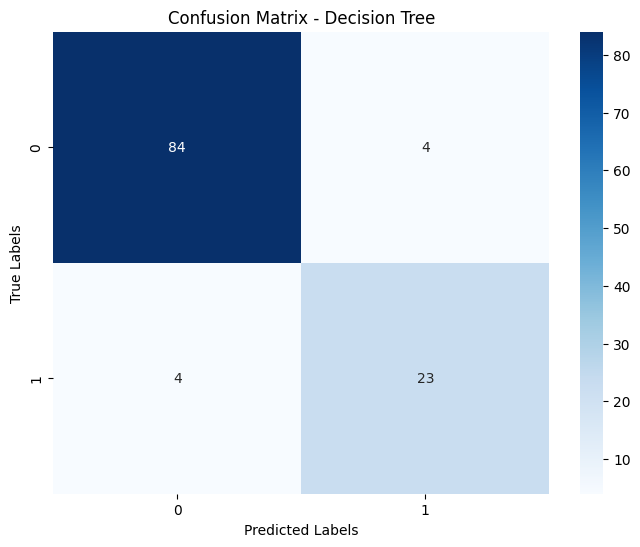

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(dt_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

#Lost Performance

In [ ]:
class_indices = [0, 1]

for class_index in class_indices:
    true_positives_dt = dt_matrix[class_index, class_index]
    false_negatives_dt = sum(dt_matrix[class_index, :]) - true_positives_dt
    false_positives_dt = sum(dt_matrix[:, class_index]) - true_positives_dt

    lost_performance_dt = false_negatives_dt + false_positives_dt
    print("Lost Performance Decision Tree Class", class_index, ":", lost_performance_dt)

Lost Performance Decision Tree Class 0 : 8
Lost Performance Decision Tree Class 1 : 8
